In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sn
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
import time
import math
import seaborn as sns

## Data Collect

In [2]:
btc_path = "https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1410912000&period2=1626048000&interval=1d&events=history&includeAdjustedClose=true"
eth_path = "https://query1.finance.yahoo.com/v7/finance/download/ETH-USD?period1=1410912000&period2=1626048000&interval=1d&events=history&includeAdjustedClose=true"
ada_path = "https://query1.finance.yahoo.com/v7/finance/download/ADA-USD?period1=1410912000&period2=1626048000&interval=1d&events=history&includeAdjustedClose=true"


btc_prices = pd.read_csv(btc_path, parse_dates=['Date'])
eth_prices = pd.read_csv(eth_path, parse_dates=['Date'])
ada_prices = pd.read_csv(ada_path, parse_dates=['Date'])


btc_prices.sort_values('Date', inplace=True)
eth_prices.sort_values('Date', inplace=True)
ada_prices.sort_values('Date', inplace=True)

btc_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [3]:
eth_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


In [4]:
ada_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


## Descripción de los datos
Antes de describir los datos vamos a realizar un cambio en el orden de las columnas para hacerlas más intuitivas a las hora de realizar el código.

In [5]:
btc_prices['Date'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    2491
unique                   2491
top       2016-11-14 00:00:00
freq                        1
first     2014-09-17 00:00:00
last      2021-07-12 00:00:00
Name: Date, dtype: object

In [6]:
btc_prices.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2487.000000,2487.000000,2487.000000,2487.000000,2487.000000,2.487000e+03
mean,8035.557402,8265.625742,7779.469894,8047.622041,8047.622041,1.296685e+10
std,12049.575929,12426.936249,11599.744147,12057.099669,12057.099669,1.981840e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,529.789002,543.714508,521.812500,532.625000,532.625000,6.949860e+07
50%,4570.359863,4655.040039,4365.640137,4579.020020,4579.020020,4.148070e+09
75%,9307.520996,9464.549805,9148.923340,9315.120117,9315.120117,1.963978e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


In [7]:
eth_prices['Date'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    2167
unique                   2167
top       2016-11-14 00:00:00
freq                        1
first     2015-08-07 00:00:00
last      2021-07-12 00:00:00
Name: Date, dtype: object

In [8]:
eth_prices.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2163.000000,2163.000000,2163.000000,2163.000000,2163.000000,2.163000e+03
mean,387.838248,403.296321,370.337959,388.710620,388.710620,7.063955e+09
std,606.875151,635.118162,573.602295,607.794395,607.794395,1.065633e+10
min,0.431589,0.482988,0.420897,0.434829,0.434829,1.021280e+05
25%,13.752700,14.263150,13.189700,13.802300,13.802300,3.823745e+07
50%,198.891510,205.580994,193.410995,199.188675,199.188675,2.150370e+09
75%,387.415650,398.901458,376.659500,387.392639,387.392639,9.623712e+09
max,4174.635742,4362.350586,3785.848633,4168.701172,4168.701172,8.448291e+10


In [9]:
ada_prices['Date'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    1381
unique                   1381
top       2017-10-30 00:00:00
freq                        1
first     2017-10-01 00:00:00
last      2021-07-12 00:00:00
Name: Date, dtype: object

In [10]:
ada_prices.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1.377000e+03
mean,0.260437,0.275009,0.244727,0.261375,0.261375,8.927668e+08
std,0.414443,0.439198,0.387126,0.415450,0.415450,2.106025e+09
min,0.018414,0.021050,0.017354,0.018539,0.018539,1.739460e+06
25%,0.045938,0.047653,0.044644,0.045989,0.045989,5.014390e+07
50%,0.086989,0.090716,0.083283,0.087370,0.087370,1.193489e+08
75%,0.188844,0.201517,0.175057,0.192164,0.192164,4.575579e+08
max,2.300190,2.461766,2.013285,2.309113,2.309113,1.914198e+10


## Calidad de los datos

In [11]:
def nulos_x_fila(fila):
    nulos = len(fila) - fila.count() #Se calcula la cantidad de valores nulos en la fila
    umbral = 0.2 
    #Se evalua si se supera el umbral definido
    if (nulos > (len(fila) * umbral)):
        return False
    else:
        return True
      
btc_prices['completitudF'] = btc_prices.apply(lambda row: nulos_x_fila(row), axis=1)
btc_prices['completitudF'].value_counts()

True     2487
False       4
Name: completitudF, dtype: int64

In [12]:
eth_prices['completitudF'] = eth_prices.apply(lambda row: nulos_x_fila(row), axis=1)
eth_prices['completitudF'].value_counts()

True     2163
False       4
Name: completitudF, dtype: int64

In [13]:
ada_prices['completitudF'] = ada_prices.apply(lambda row: nulos_x_fila(row), axis=1)
ada_prices['completitudF'].value_counts()

True     1377
False       4
Name: completitudF, dtype: int64

In [14]:
completitud_d = (len(btc_prices['completitudF']) - sum(btc_prices['completitudF'])) / len(btc_prices['completitudF']) * 100
print('Completitud dataset Bitcoin:', completitud_d, '%')

Completitud dataset Bitcoin: 0.16057808109193095 %


In [15]:
completitud_d = (len(eth_prices['completitudF']) - sum(eth_prices['completitudF'])) / len(eth_prices['completitudF']) * 100
print('Completitud dataset Ethereum:', completitud_d, '%')

Completitud dataset Ethereum: 0.18458698661744347 %


In [16]:
completitud_d = (len(ada_prices['completitudF']) - sum(ada_prices['completitudF'])) / len(ada_prices['completitudF']) * 100
print('Completitud dataset Cardano:', completitud_d, '%')

Completitud dataset Cardano: 0.2896451846488052 %


In [17]:
btc_prices[btc_prices['completitudF'] == False]

,Date,Open,High,Low,Close,Adj Close,Volume,completitudF
2039,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,False
2214,2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN,False
2217,2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN,False
2218,2020-10-13,NaN,NaN,NaN,NaN,NaN,NaN,False


In [18]:
eth_prices[eth_prices['completitudF'] == False]

,Date,Open,High,Low,Close,Adj Close,Volume,completitudF
1715,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,False
1890,2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN,False
1893,2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN,False
1894,2020-10-13,NaN,NaN,NaN,NaN,NaN,NaN,False


In [19]:
ada_prices[ada_prices['completitudF'] == False]

,Date,Open,High,Low,Close,Adj Close,Volume,completitudF
929,2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,False
1104,2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN,False
1107,2020-10-12,NaN,NaN,NaN,NaN,NaN,NaN,False
1108,2020-10-13,NaN,NaN,NaN,NaN,NaN,NaN,False


Vemos como fallan los mismos cuatro días en todos los dataset, es posible que sea un fallo en los datos esos días, para solucionarlo aplicamos un **ForwardFill** y los rellenamos, al ser 4 días sobre el dataset completo, no lo considero peligroso para el problema

In [20]:
btc_prices.fillna(method="ffill", inplace=True)
btc_prices.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
completitudF    0
dtype: int64

In [21]:
eth_prices.fillna(method="ffill", inplace=True)
eth_prices.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
completitudF    0
dtype: int64

In [22]:
ada_prices.fillna(method="ffill", inplace=True)
ada_prices.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
completitudF    0
dtype: int64

## Selección de características
Como nos interesa para el problema tener una única serie temporal, vamos a seleccionar la variable 'Close' de cada uno de los datasets, que va a ser sobre la que vamos a trabajar en la parte de modelos

In [23]:
btc_close = btc_prices[['Date','Close']]
eth_close = eth_prices[['Date','Close']]
ada_close = ada_prices[['Date','Close']]

btc_close.head()

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [24]:
btc_close.columns = ['date', 'close']
eth_close.columns = ['date', 'close']
ada_close.columns = ['date', 'close']

btc_close.head()

,date,close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [25]:
eth_close.head()

,date,close
0,2015-08-07,2.772120
1,2015-08-08,0.753325
2,2015-08-09,0.701897
3,2015-08-10,0.708448
4,2015-08-11,1.067860


In [26]:
ada_close.head()

,date,close
0,2017-10-01,0.024969
1,2017-10-02,0.025932
2,2017-10-03,0.020816
3,2017-10-04,0.021931
4,2017-10-05,0.021489


In [27]:
btc_close.set_index('date', inplace=True)
eth_close.set_index('date', inplace=True)
ada_close.set_index('date', inplace=True)
btc_close.head()

,close
date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [28]:
btc_close.tail()

,close
date,
2021-07-08,32877.371094
2021-07-09,33798.011719
2021-07-10,33520.519531
2021-07-11,34240.187500
2021-07-12,33155.847656


Podemos ver como la fecha por la que comienza cada conjunto de datos es diferente, esto se debe a que las monedas Ethereum y Cardano se crearon posteriormente a Bitcoin

In [29]:
btc_close.columns = ['btcClose']
eth_close.columns = ['ethClose']
ada_close.columns = ['adaClose']

stocks_close = pd.concat([btc_close, eth_close, ada_close], axis=1)
stocks_close.reset_index(inplace=True)
print('Stocks shape:', stocks_close.shape)
print('NaN per var', stocks_close.isna().sum())
stocks_close.head()

Stocks shape: (2491, 4)
NaN per var date           0
btcClose       0
ethClose     324
adaClose    1110
dtype: int64


,date,btcClose,ethClose,adaClose
0,2014-09-17,457.334015,NaN,NaN
1,2014-09-18,424.440002,NaN,NaN
2,2014-09-19,394.795990,NaN,NaN
3,2014-09-20,408.903992,NaN,NaN
4,2014-09-21,398.821014,NaN,NaN


In [30]:
stocks_close.dropna(inplace=True)
stocks_close.head()

,date,btcClose,ethClose,adaClose
1110,2017-10-01,4403.740234,302.337006,0.024969
1111,2017-10-02,4409.319824,297.475006,0.025932
1112,2017-10-03,4317.479980,292.463013,0.020816
1113,2017-10-04,4229.359863,292.657990,0.021931
1114,2017-10-05,4328.410156,295.863007,0.021489


## Feature building

Para contruir el atributo **go_up** vamos a basarnos en el atributo **close** inicialmente, en futuras iteraciones veremos otras maneras de hacerlo si es conveniente.

In [31]:
stocks_close['btcGoUp'] = stocks_close.apply(lambda row: row.name > 1110 and row['btcClose'] > stocks_close.loc[ row.name-1 , : ]['btcClose'], axis=1)
stocks_close['ethGoUp'] = stocks_close.apply(lambda row: row.name > 1110 and row['ethClose'] > stocks_close.loc[ row.name-1 , : ]['ethClose'], axis=1)
stocks_close['adaGoUp'] = stocks_close.apply(lambda row: row.name > 1110 and row['adaClose'] > stocks_close.loc[ row.name-1 , : ]['adaClose'], axis=1)


stocks_close.head()

,date,btcClose,ethClose,adaClose,btcGoUp,ethGoUp,adaGoUp
1110,2017-10-01,4403.740234,302.337006,0.024969,False,False,False
1111,2017-10-02,4409.319824,297.475006,0.025932,True,False,True
1112,2017-10-03,4317.479980,292.463013,0.020816,False,False,False
1113,2017-10-04,4229.359863,292.657990,0.021931,False,True,True
1114,2017-10-05,4328.410156,295.863007,0.021489,True,True,False


In [32]:
stocks_close.dtypes

date        datetime64[ns]
btcClose           float64
ethClose           float64
adaClose           float64
btcGoUp               bool
ethGoUp               bool
adaGoUp               bool
dtype: object

## Data Visualization

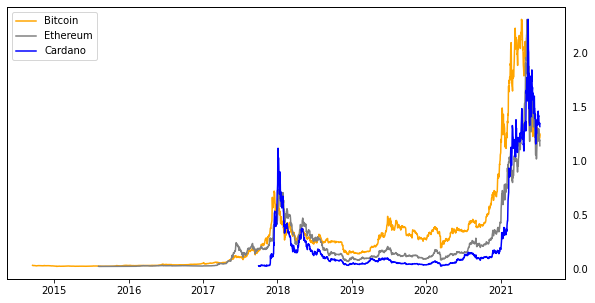

In [33]:
stocks_close_ts = stocks_close.set_index('date')

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

ax2 = ax.twinx()
ax3 = ax2.twinx()

lns1 = ax.plot(btc_close.index, btc_close.btcClose, label=f"Bitcoin", color="orange")
lns2 = ax2.plot(eth_close.index, eth_close.ethClose, label=f"Ethereum", color="grey")
lns3 = ax3.plot(ada_close.index, ada_close.adaClose, label=f"Cardano", color="blue")

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.tick_params(left = False, right = False , labelleft = False)
ax2.tick_params(left = False, right = False , labelleft = False)
ax3.tick_params(left = False, right = False , labelleft = False)

plt.show()

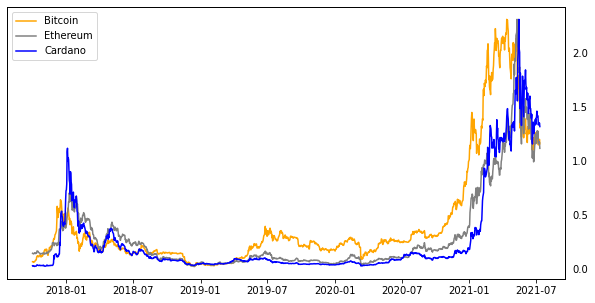

In [34]:
stocks_close_ts = stocks_close.set_index('date')

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

ax2 = ax.twinx()
ax3 = ax2.twinx()

lns1 = ax.plot(stocks_close_ts.index, stocks_close_ts.btcClose, label=f"Bitcoin", color="orange")
lns2 = ax2.plot(stocks_close_ts.index, stocks_close_ts.ethClose, label=f"Ethereum", color="grey")
lns3 = ax3.plot(stocks_close_ts.index, stocks_close_ts.adaClose, label=f"Cardano", color="blue")

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.tick_params(left = False, right = False , labelleft = False)
ax2.tick_params(left = False, right = False , labelleft = False)
ax3.tick_params(left = False, right = False , labelleft = False)

plt.show()

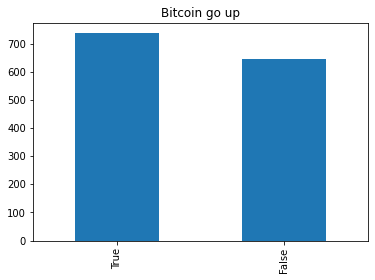

In [35]:
stocks_close['btcGoUp'].value_counts().plot(kind='bar', title='Bitcoin go up')

In [36]:
print(stocks_close['btcGoUp'].value_counts())
stocks_close['btcGoUp'].value_counts()[True] / sum(stocks_close['btcGoUp'].value_counts())

True     736
False    645
Name: btcGoUp, dtype: int64


0.5329471397538016

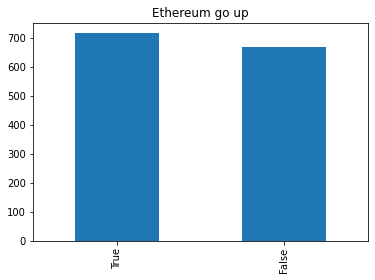

In [37]:
stocks_close['ethGoUp'].value_counts().plot(kind='bar', title='Ethereum go up')

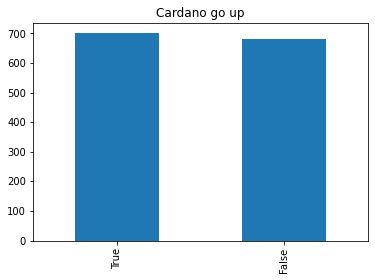

In [38]:
stocks_close['adaGoUp'].value_counts().plot(kind='bar', title='Cardano go up')

In [39]:
import plotly.graph_objects as go

from_2017_btc = btc_prices[btc_prices['Date'] > np.datetime64('2020-07-01')]
fig = go.Figure(data=[go.Candlestick(x=from_2017_btc['Date'],
                open=from_2017_btc['Open'], high=from_2017_btc['High'],
                low=from_2017_btc['Low'], close=from_2017_btc['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

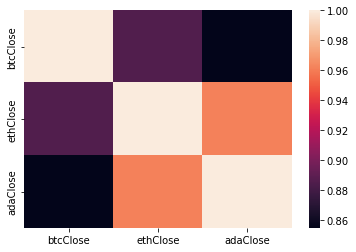

In [40]:
stocks_close.drop(['btcGoUp', 'ethGoUp', 'adaGoUp'], axis=1, inplace=True)
sns.heatmap(stocks_close.corr())

## Save Datasets

In [41]:
btc_close.to_csv('btcStocks.csv', index=True)
eth_close.to_csv('ethStocks.csv', index=True)
ada_close.to_csv('adaStocks.csv', index=True)

## Multivariate

In [42]:
stocks_close.to_csv('stocks.csv', index=False)

## Conjunto de datos evaluación **entrenamiento**

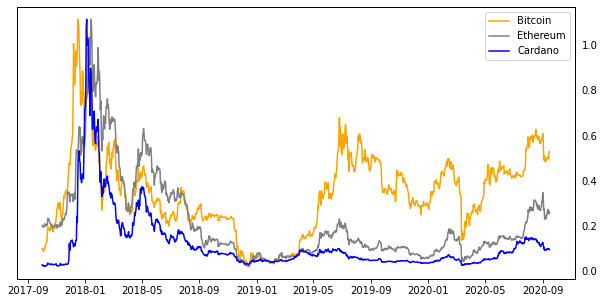

In [43]:
eval_stocks_close = stocks_close.head(len(stocks_close)-300)
eval_stocks_close_ts = eval_stocks_close.set_index('date')

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

ax2 = ax.twinx()
ax3 = ax2.twinx()

lns1 = ax.plot(eval_stocks_close_ts.index, eval_stocks_close_ts.btcClose, label=f"Bitcoin", color="orange")
lns2 = ax2.plot(eval_stocks_close_ts.index, eval_stocks_close_ts.ethClose, label=f"Ethereum", color="grey")
lns3 = ax3.plot(eval_stocks_close_ts.index, eval_stocks_close_ts.adaClose, label=f"Cardano", color="blue")

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.tick_params(left = False, right = False , labelleft = False)
ax2.tick_params(left = False, right = False , labelleft = False)
ax3.tick_params(left = False, right = False , labelleft = False)

plt.show()

## Conjunto de datos evaluación **prueba**

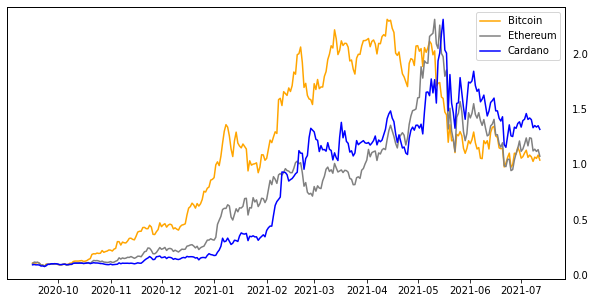

In [44]:
eval_stocks_close = stocks_close.tail(300)
eval_stocks_close_ts = eval_stocks_close.set_index('date')

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

ax2 = ax.twinx()
ax3 = ax2.twinx()

lns1 = ax.plot(eval_stocks_close_ts.index, eval_stocks_close_ts.btcClose, label=f"Bitcoin", color="orange")
lns2 = ax2.plot(eval_stocks_close_ts.index, eval_stocks_close_ts.ethClose, label=f"Ethereum", color="grey")
lns3 = ax3.plot(eval_stocks_close_ts.index, eval_stocks_close_ts.adaClose, label=f"Cardano", color="blue")

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.tick_params(left = False, right = False , labelleft = False)
ax2.tick_params(left = False, right = False , labelleft = False)
ax3.tick_params(left = False, right = False , labelleft = False)

plt.show()

# Nuevas acciones

In [45]:
btc_new_path = "https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1626134400&period2=1630454400&interval=1d&events=history&includeAdjustedClose=true" # new stocks
eth_new_path = "https://query1.finance.yahoo.com/v7/finance/download/ETH-USD?period1=1626134400&period2=1630454400&interval=1d&events=history&includeAdjustedClose=true" # new stocks
ada_new_path = "https://query1.finance.yahoo.com/v7/finance/download/ADA-USD?period1=1626134400&period2=1630454400&interval=1d&events=history&includeAdjustedClose=true" # new stocks

btc_new_prices = pd.read_csv(btc_new_path, parse_dates=['Date'])
eth_new_prices = pd.read_csv(eth_new_path, parse_dates=['Date'])
ada_new_prices = pd.read_csv(ada_new_path, parse_dates=['Date'])


btc_new_prices.sort_values('Date', inplace=True)
eth_new_prices.sort_values('Date', inplace=True)
ada_new_prices.sort_values('Date', inplace=True)

btc_new_close = btc_new_prices[['Date','Close']]
eth_new_close = eth_new_prices[['Date','Close']]
ada_new_close = ada_new_prices[['Date','Close']]

btc_new_close.columns = ['date', 'close']
eth_new_close.columns = ['date', 'close']
ada_new_close.columns = ['date', 'close']

btc_new_close.set_index('date', inplace=True)
eth_new_close.set_index('date', inplace=True)
ada_new_close.set_index('date', inplace=True)

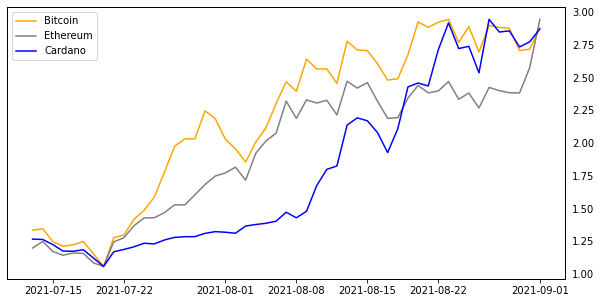

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

ax2 = ax.twinx()
ax3 = ax2.twinx()

lns1 = ax.plot(btc_new_close.index, btc_new_close.close, label=f"Bitcoin", color="orange")
lns2 = ax2.plot(eth_new_close.index, eth_new_close.close, label=f"Ethereum", color="grey")
lns3 = ax3.plot(ada_new_close.index, ada_new_close.close, label=f"Cardano", color="blue")

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.tick_params(left = False, right = False , labelleft = False)
ax2.tick_params(left = False, right = False , labelleft = False)
ax3.tick_params(left = False, right = False , labelleft = False)

plt.show()

In [47]:
btc_new_close.to_csv('btcActualStocks.csv', index=True)
eth_new_close.to_csv('ethActualStocks.csv', index=True)
ada_new_close.to_csv('adaActualStocks.csv', index=True)